# Fashion MNIST

By Darshan Shah

### Approach  

I have used Tensorflow and Keras (as backend) to create the Neural network and Used Tensorboard for Visualization and Analysis.  

The Following is the workflow I followed:  
**1. Load the Data**  
The entire given dataset is extracted from npy files using the numpy load function. The training and test dataset are saved in their respective variables.  

**2. Data preprocessing**  
Before actually vreating and defining the model, we pre-process the data to make sure it meets the requirements of the model.

**2.a. Reshapeing** The input dataset is of the shape (60000, 1, 28,28) which is of the NCHW or channel first format. But Since, I am not using a GPU and all the processing is done in CPU, the CPU version of Tensorflow supports only NHWC format of data. Hence the data is reshaped accordingly.  

**2.b. Normalization**
It was observed that the given dataset, pixel values ranges from 0-255. So as a preprocessing step the test and traininig data are both bought within a range of 0-1 for easier processing and efficient training.  

**2.c. Categorize Labels**
The output of the Network just like that of the MNIST dataset would be such that a neuron corresponding to a specific label would fire. Unlike MNIST where the Labels were just single digit numbers, For Fashion MNIST, the numeric output would be very unintuitive. Hence, List is created whose every index corresponds to a Label. The output of the network is mapped to the index of the list and hence the Label.

**3. Define the Model**  
The images in Fasion MNIST dataset consists of much more features compared to the MNIST handwritten digits. Hence, a more complex convolutional Neural network would be ideal for this application. where each filter could look for certain features and fire neurons accordingly.  
The model consists of a 2D input layer which takes the entire 28x28 image matrix as an input and convolves with a filter of 5x5. The window size of 5x5 is determined arbitrarily by trail and error. I got lower accuracy with smaller sized filters. probably because a smaller window size of 3x3 might be good enough to capture lower level features such as lines and edges. but may not be capable of saving higher level features.  
We use ReLU as an activation function due to it's non  linear nature and it's popularity for applications like these.  A small layer of Max-pooling helps reduce size of the image and yet retain vital features and information. I also considered using Dropout layer. but was afraid, I might lose useful information provided the image is already small in size and the network is not that huge.  
With simialr thought process, I have added one more 2D Convolutional Layer with bigger filter for higher level features and ReLU as actuvation function.  
Finally, the output of this network is flattened and an intermediate fully connected layer of arbitrary size of 32 is created before obtaining the resultant output. 
A softmax function which gives us the probablity distribution funciton is used at the output layer.  

**4. Configure the Model**  
The Model is configured with an Adam optimizer and a categorical_crossentropy loss function which is ideal for this application. 

**5. Model Fitting**  
The model created is fit for the given configuration and run for 10 Epochs. I have used Tensorboard to visualise the training parameters and metrics.  
The summary of the training process is as shown below:

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
activation (Activation)      (None, 26, 26, 128)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         802944    
_________________________________________________________________
activation_1 (Activation)    (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                200736    
__________

## Analysis

**Plots from Tensorboard**  
The following plots are a comparision of 3 of the several experimental runs that I ran. 
Color code:  
Orange: 3x3 Convolutional Filter in second third layer. 5 epochs
Blue: 7x7 Convolutional Filter in second Layer, 10 Epochs
Pink: 5x5 Filter size in first layer and 7x7 in third layer. 6 Epochs

**Accuracy over the Batch**  

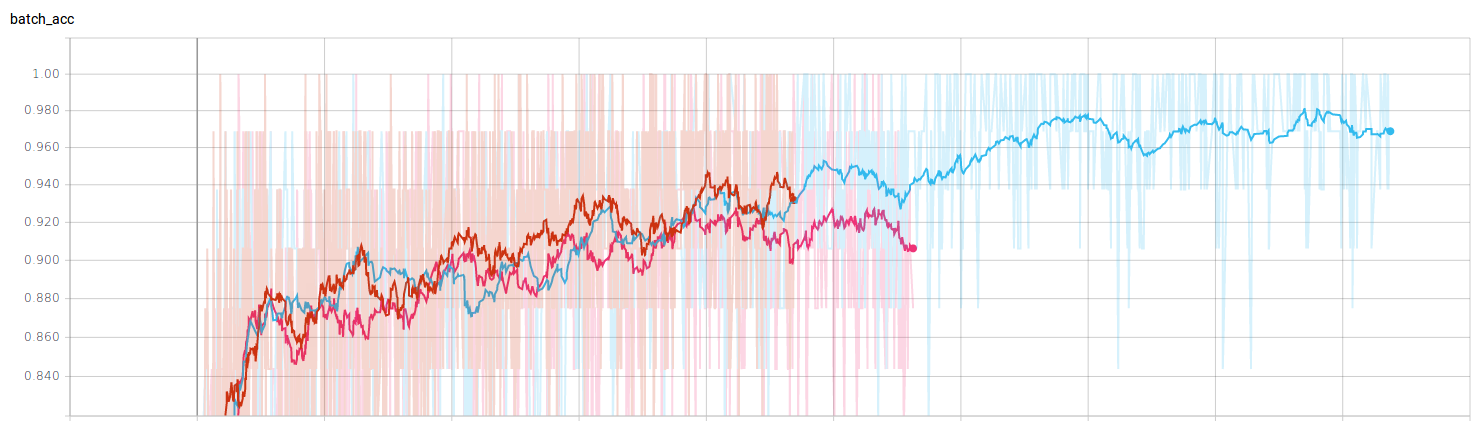

**Loss across the Batch**  

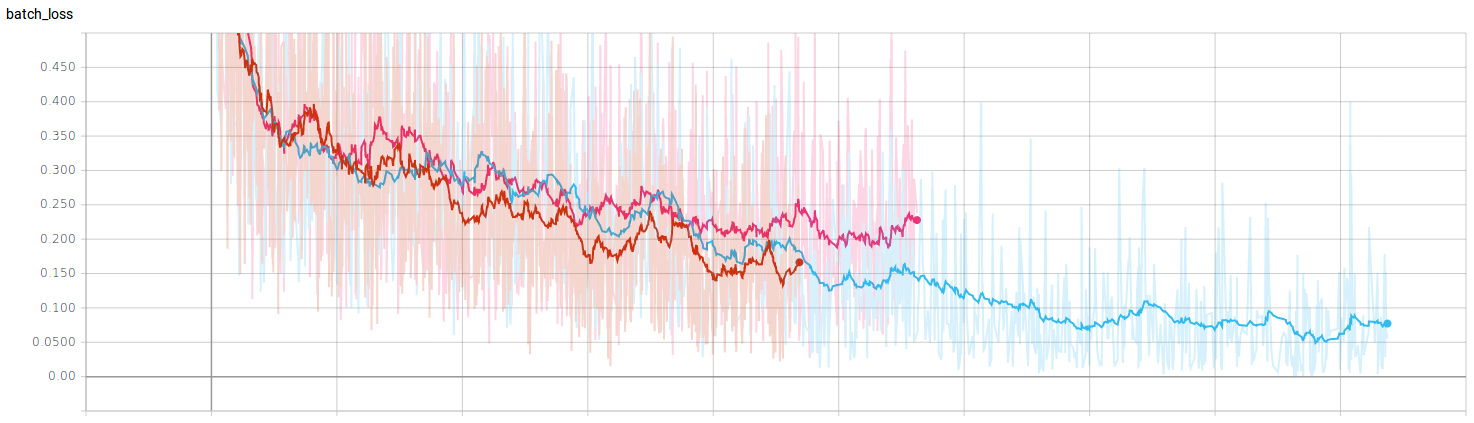

**Evolution of Accuracy and Loss Over Epochs**

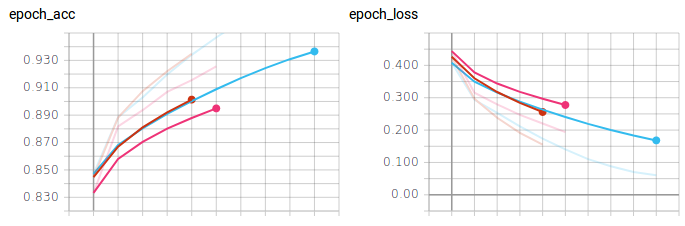

**Weights and Biases across layers**  

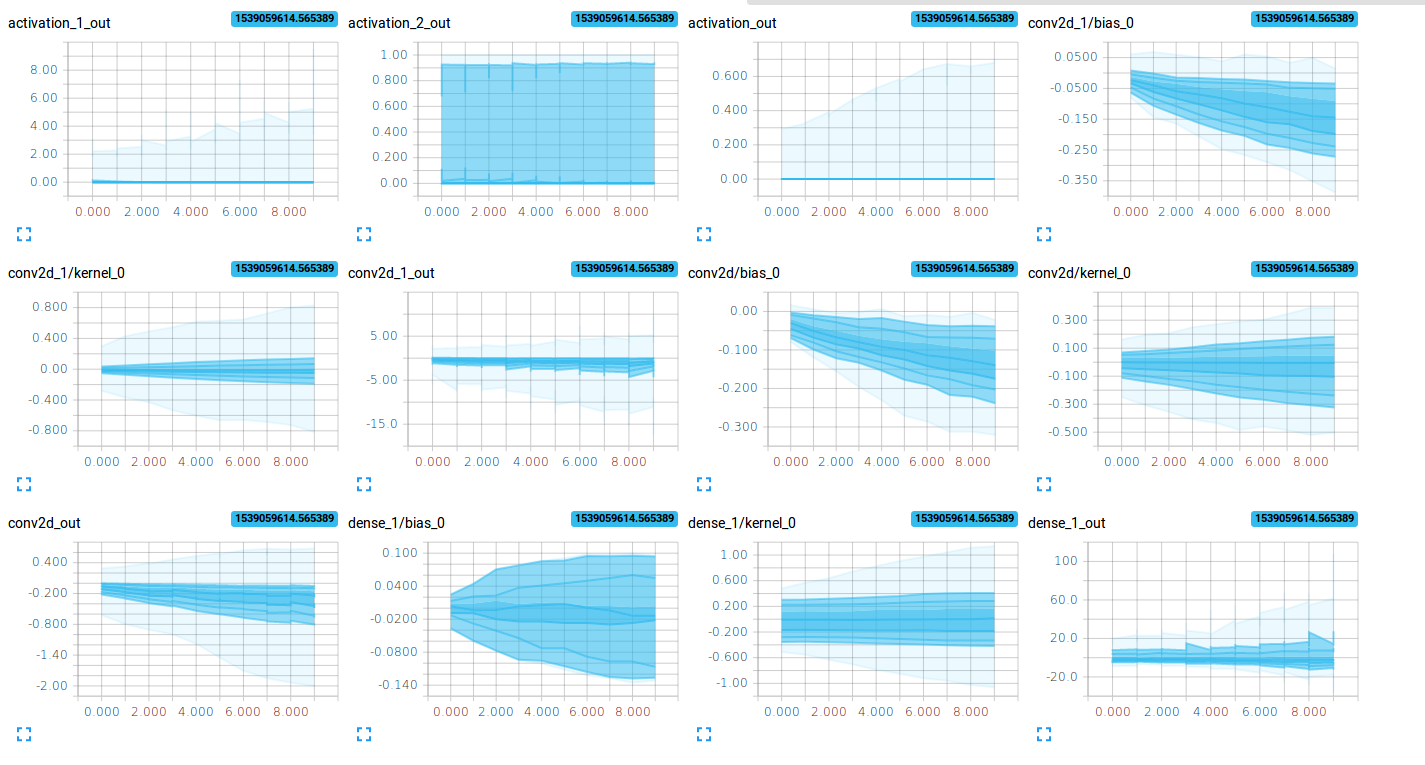
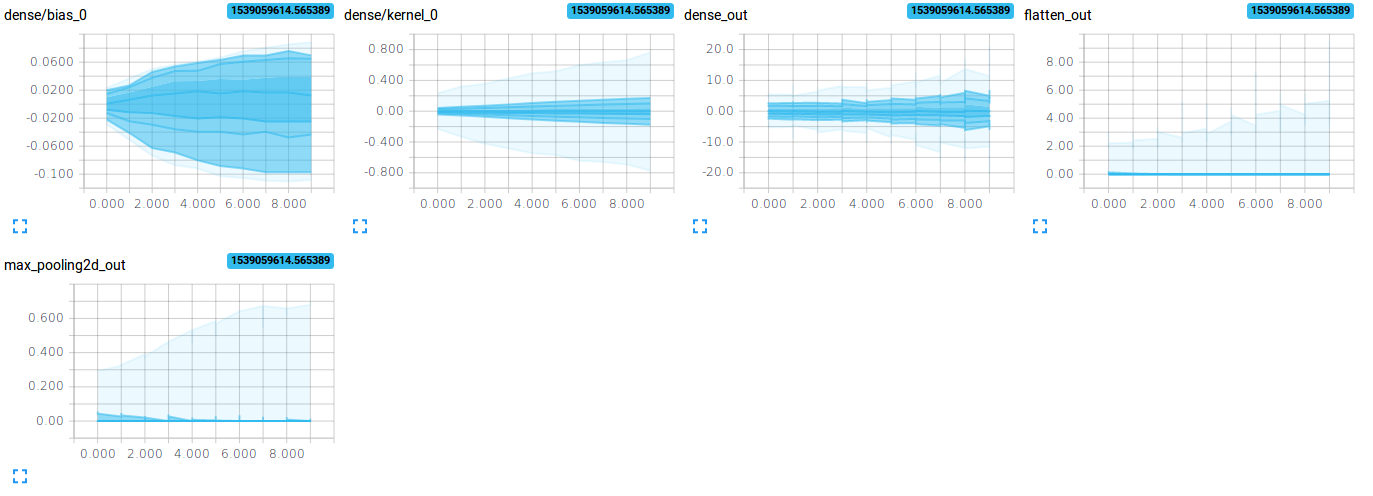

**Evolution of Weights and Biases over Epochs**
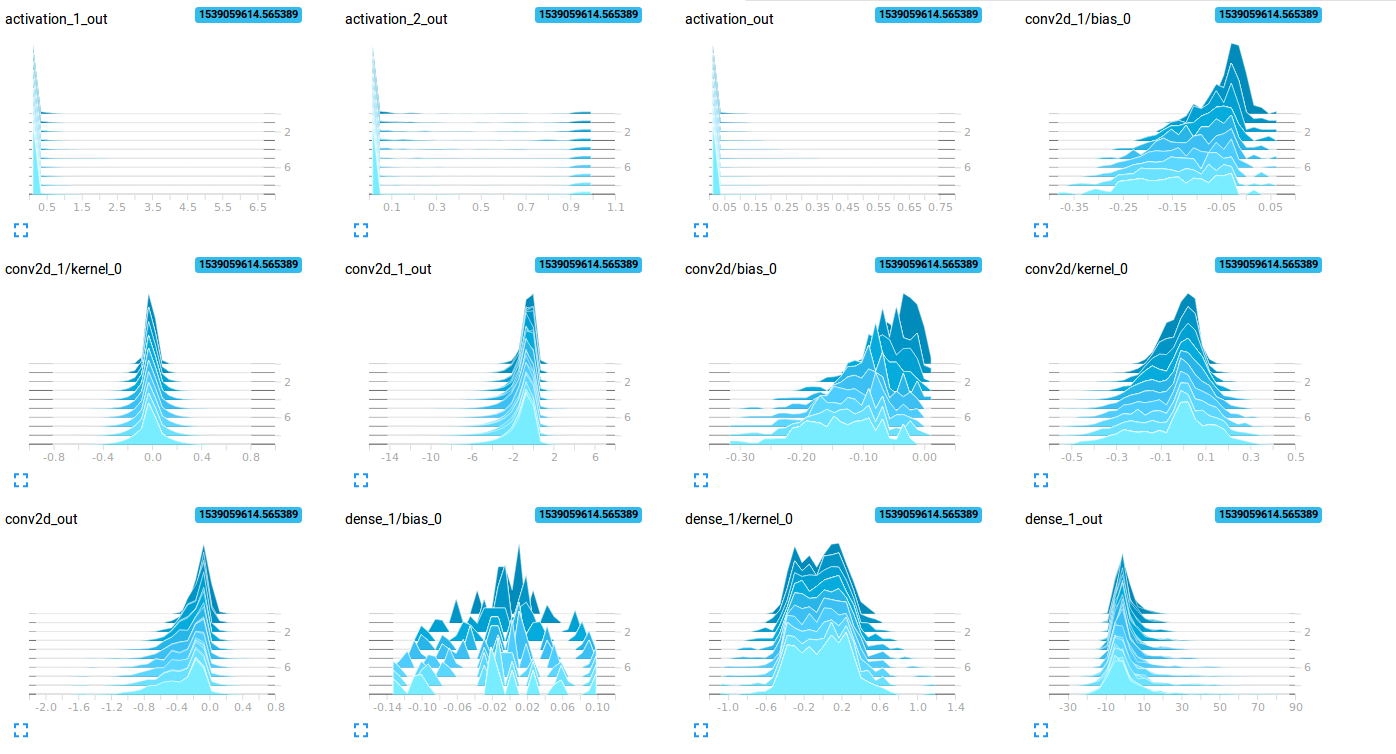


## Code

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# import tensorflow.keras.backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from time import time
from tensorflow.python.keras.callbacks import TensorBoard
import keras
%matplotlib inline

In [3]:
#Load data from the given Numpy Files. (Assuming, the files are in the same directory)
x_train = np.load('trainImages.npy')
y_train = np.load('trainLabels.npy')
x_test = np.load("testImages.npy")
y_test = np.load("testLabels.npy")
# tf.keras.backend.set_image_data_format('channels_first')

In [4]:
img_rows = 28
img_cols = 28
if tf.keras.backend.image_data_format() == 'channels_first': 
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols) 
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols) 
    input_shape = (1, img_rows, img_cols) 
else: 
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) 
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) 
    input_shape = (img_rows, img_cols, 1) 
    x_train = x_train.astype('float32')

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
#Categorize the data
Categories = ['T-shirt/top', 
              'Trouser', 
              'Pullover', 
              'Dress', 
              'Coat',
              'Sandal',
              'Shirt',
              'Sneaker',
              'Bag',
              'Ankle boot']
# class_num = Categories.index()

In [8]:
#Normalise the data
x_train = tf.keras.utils.normalize(x_train, axis=-1, order=2)
x_test = tf.keras.utils.normalize(x_test, axis=-1)

In [9]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [11]:
model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=(28,28,1), data_format='channels_last'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (7, 7)))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(32))

model.add(Dense(10))
model.add(Activation('softmax'))

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
y_train.shape

(60000, 10)

In [14]:
tensorboard = TensorBoard(log_dir="logs/{}".format(time()), histogram_freq=1, write_graph=True, write_images=True)
history = model.fit(x_train, y_train, batch_size=32, epochs=6, validation_split=0.3, verbose=1, validation_data = (x_test, y_test), callbacks=[tensorboard])

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 321s 5ms/step - loss: 0.4080 - acc: 0.8461 - val_loss: 0.3489 - val_acc: 0.8720
Epoch 2/6
60000/60000 [==============================] - 332s 6ms/step - loss: 0.2947 - acc: 0.8869 - val_loss: 0.3209 - val_acc: 0.8799
Epoch 3/6
60000/60000 [==============================] - 306s 5ms/step - loss: 0.2516 - acc: 0.9043 - val_loss: 0.3138 - val_acc: 0.8856
Epoch 4/6
60000/60000 [==============================] - 278s 5ms/step - loss: 0.2156 - acc: 0.9181 - val_loss: 0.3191 - val_acc: 0.8832
Epoch 5/6
60000/60000 [==============================] - 279s 5ms/step - loss: 0.1782 - acc: 0.9318 - val_loss: 0.3450 - val_acc: 0.8813
Epoch 6/6
60000/60000 [==============================] - 282s 5ms/step - loss: 0.1431 - acc: 0.9456 - val_loss: 0.3768 - val_acc: 0.8832


In [15]:
val_loss, val_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 10s 1ms/step


In [16]:
print("Loss for Test Data = " + str(val_loss))  # model's loss (error)
print("Accuracy for Test Data = " + str(val_acc))  # model's accuracy

Loss for Test Data = 0.37675040543079374
Accuracy for Test Data = 0.8832


**Additional Plots**

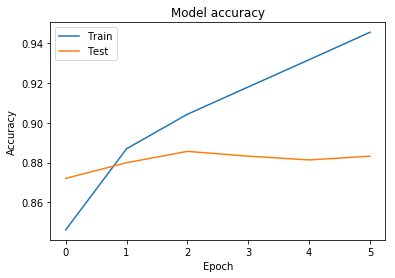

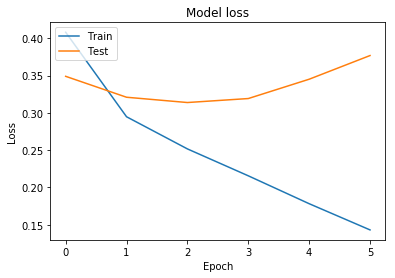

In [17]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()